# Calculation of Spiral Tip Properties
Tim Tyree<br>
2.25.2021

In [1]:
from lib.my_initialization import *
from lib import *
from lib.utils.merge_cloud_results import *
import seaborn as sns
from scipy.interpolate import CubicSpline
%load_ext autoreload
%autoreload 2

In [2]:
# from lib import compute_slope_vs_lag
# from lib.measure.compute_slope import compute_95CI_ols

In [3]:
# # from lib.viewer.PlotEMSD import *
# from lib.measure import compute_Dhat

In [4]:
# #make plots in darkmode
# import seaborn as sns
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# Computing Spiral Tip Properties for one trial

In [1]:
# file=search_for_file()
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/all_traj_longer_than_1000.csv'

In [6]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

# df=pd.read_csv(file)
# DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
# df=get_all_longer_than(df,DT,T_min=T_min)

# #count remaining individuals
# num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
# emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


In [7]:
# #save emsd
# savefn=f"emsd_longer_than_{T_min}.csv"
# os.chdir(savefig_folder)
# emsd.to_csv(savefn)#,index=False)
# os.path.abspath(savefn)
# # emsd

In [8]:
file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/emsd_longer_than_1000.csv'
DT=0.4
num_individuals=4064
emsd=pd.read_csv(file,index_col='lagt')
# lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)

In [9]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

saved figure in 
	emsd_longer_than_1000.png


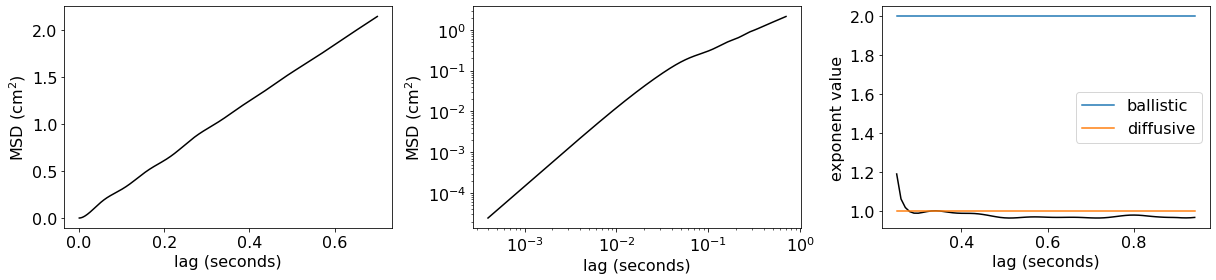

In [10]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [11]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7493536150894692 +- 0.00032435236477258586 cm^2/s... Rsq=0.9999531639575268
v_rms = 11.681972592374715 +- 0.06724019170027333 cm/s... Rsq=0.9999503070021935


In [12]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

4064


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.968574,0.9664,0.749354,0.000324,0.999953,11.681973,0.06724,0.99995,4064,0.0005,25,param_set_8


#  Showing reproducibility with large number of independent trials with the same settings

In [14]:
# file=search_for_file()
file="/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/longest_unwrapped_trajectories.csv"

In [15]:
T_min=1000#ms
omit_time=150#ms
DS=0.025#cm/pixel
figsize=(17,4);fontsize=16
saving=True

df=pd.read_csv(file)
DT=compute_time_between_frames(df);print(f"DT={DT}")

# df=return_unwrapped_trajectory(df, width, height, sr, mem, dsdpixel, **kwargs)
df=get_all_longer_than(df,DT,T_min=T_min)

#count remaining individuals
num_individuals=len(list(set(df.particle.values)));print(f"num_individuals={num_individuals}")
emsd=compute_emsd(traj=df.copy(), DT=DT, omit_time=omit_time, printing=False,DS=DS)


DT=1.0
num_individuals=156


In [16]:
savefig_folder=os.path.dirname(file)#os.path.join(nb_dir,'Figures/msd_loglog')
savefig_fn=os.path.basename(file).replace('.csv','.png')#f'logMSD_vs_loglag_Tmin_{T_min/10**3:.1f}_N_{trials_considered}_mni_{min_num_individuals}.png'

In [17]:
#save emsd
savefn=f"emsd_longer_than_{T_min}.csv"
os.chdir(savefig_folder)
emsd.to_csv(savefn)#,index=False)
os.path.abspath(savefn)

'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'

In [19]:
# file='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-2/ds_5_param_set_8_fastkernel_V_0.4/emsd_longer_than_1000.csv'
# DT=1.0
# num_individuals=156
# emsd=pd.read_csv(file,index_col='lagt')
# # lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=50,stepsize=10)
# emsd.iloc[-1]

saved figure in 
	longest_unwrapped_trajectories.png


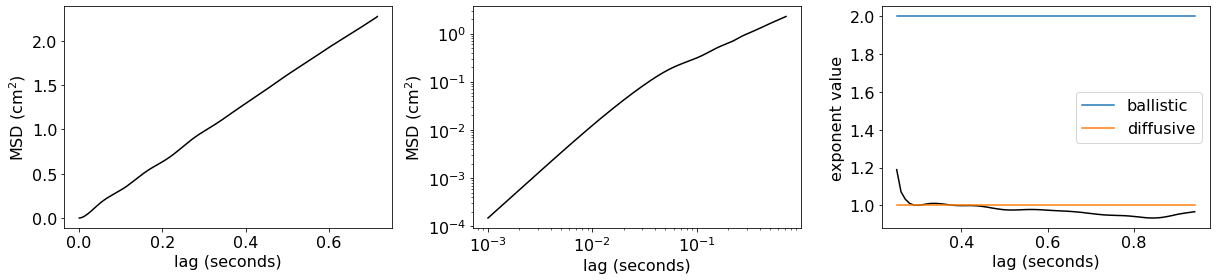

In [20]:

fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min,omit_time,window_width=500,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)

format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False)

if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

In [21]:
slope_values[-1]
# slope_values[lag_values==.5][0]


0.9662999306673726

In [22]:
#compute and print v_rms and D
# compute diffusion coefficient and rms velocity of spiral tips
v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)

# Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=200,MSD_thresh=.2,max_lagtime=50)
print(f"make sure the right DT scale was used!")
print(f"make sure to record in spreadsheet!")
print(f"time window for D was from {tau_min:.0f} to {tau_max:.0f} ms.")
print(f"D = {Dhat} +- {Delta_Dhat} cm^2/s... Rsq={Rsquared_D}")
print(f"v_rms = {v_rms} +- {Delta_v_rms} cm/s... Rsq={Rsquared_v}")


make sure the right DT scale was used!
make sure to record in spreadsheet!
time window for D was from 300 to 800 ms.
D = 0.7835859198229775 +- 0.0012118563085177095 cm^2/s... Rsq=0.9997525076036896
v_rms = 11.217029621223183 +- 0.1437880740088317 cm/s... Rsq=0.9997535809794501


In [23]:
#make pd.DataFrame that can be copy/pasted to a spreadsheet
df_output=pd.DataFrame({
    'exponent_final':slope_values[-1],
    'exponent_500':slope_values[lag_values==.5][0],
    "Dhat":[Dhat],
    "Delta_Dhat":[Delta_Dhat],
    "Rsquared_D":[Rsquared_D],
    "v_rms":v_rms,
    "Delta_v_rms":Delta_v_rms,
    "Rsquared_v":Rsquared_v,
    "num_individuals":num_individuals,
    "diffCoef":0.0005,
    'area':25,
    'model':'param_set_8'
})
print(num_individuals)
df_output

156


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.9663,0.976476,0.783586,0.001212,0.999753,11.21703,0.143788,0.999754,156,0.0005,25,param_set_8


# Compute key features for each trial from a distributed survey
Using results for 1232 distinct trials

In [322]:
log_folder='/home/timothytyree/Documents/GitHub/care_worker/python/osg_output/Log/'
# log_folder="/Users/timothytyree/Documents/GitHub/care_worker/python/Log"
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the number of output files in folder is {len(input_fn_lst)}.")

the number of output files in folder is 2712.


In [323]:
#compute the list of all summarizing results
DS=0.025
tau_min=150#500
window_width=2000#500
df_output_lst=[]
for input_fn in input_fn_lst:
    line_no,dict_params=parse_input_params(input_fn)
    # print(dict_params)

    try:
        num_individuals=eval(dict_params['N'])
    except KeyError as e:
        num_individuals=0

    if num_individuals>0:
        emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
    else:
#         print(f'no emsd found in {os.path.basename(input_fn)}')
        emsd=None
    if emsd is not None:
        # def summarize_trial(emsd,dict_params):
        area=(eval(dict_params['L'])*DS)**2#cm^2
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
        v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=500,window_width=500)
        df_output=pd.DataFrame({
            'exponent_final':slope_values[-1],
            'exponent_500':slope_values[lag_values==.5][0],
            "Dhat":[Dhat],
            "Delta_Dhat":[Delta_Dhat],
            "Rsquared_D":[Rsquared_D],
            "v_rms":v_rms,
            "Delta_v_rms":Delta_v_rms,
            "Rsquared_v":Rsquared_v,
            "num_individuals":num_individuals,
            "diffCoef":eval(dict_params['diffCoef']),
            'area':area,
            'model':'param_set_8'
        })
    #     print(num_individuals)
        df_output_lst.append(df_output)
beep(5)

0

In [324]:
print(f"{len(df_output_lst)} distinct trials were successfully recorded.")
df=pd.concat(df_output_lst)
df.head()

1232 distinct trials were successfully recorded.


,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model
0,0.982359,0.710464,0.230326,0.002213,0.994285,2.839273,0.017053,0.999946,15,0.00075,49.0,param_set_8
0,1.120488,0.751967,0.306851,0.002041,0.997254,3.342914,0.013076,0.999977,3,1.00000,25.0,param_set_8
0,1.135369,0.828513,0.311083,0.002495,0.996012,3.085586,0.020755,0.999932,50,1.00000,64.0,param_set_8
0,1.020487,0.755092,0.262642,0.002314,0.995192,3.067182,0.015930,0.999960,19,5.00000,49.0,param_set_8
0,1.312073,0.984793,0.474564,0.004532,0.994356,3.326198,0.019817,0.999947,17,0.00025,64.0,param_set_8


In [325]:
#save df as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results')
os.chdir(save_folder)
save_fn='cloud_results_fk_versus_diffCoef_versus_area.csv'
df.to_csv(save_fn)

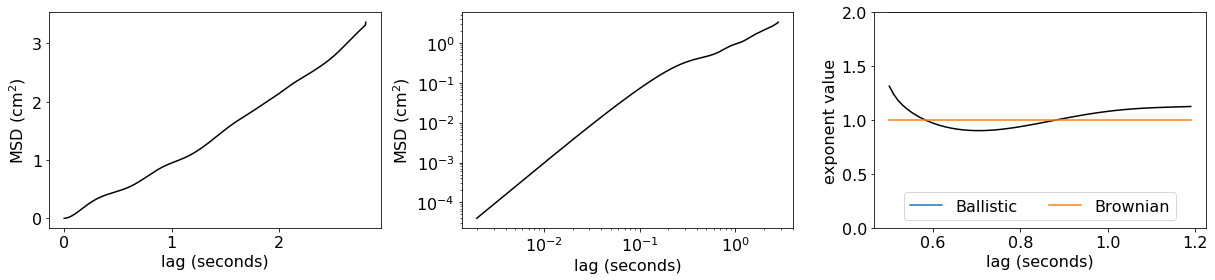

In [328]:
savefig_folder=os.path.join(nb_dir,'Figures/msd_exponents')
os.chdir(save_folder)
savefig_fn='cloud_results_fk_versus_diffCoef_versus_area.png'

#plot emsd and exponent for given pd.DataFrame instance named emsd
saving=False
figsize=(17,4);fontsize=16
fig,axs=plt.subplots(ncols=3,figsize=figsize)
plot_emsd(axs[0],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)

plot_emsd(axs[1],emsd,label='_Hidden', color='black',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)

lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=1000,stepsize=10)
plot_slope_of_emsd(axs[2],lag_values,slope_values,label='_Hidden', color='black', alpha=1.,plot_reference_lines=True)
format_slope_of_emsd(axs[2],fontsize=fontsize,use_loglog=False,loc='lower center')
axs[2].set_ylim(0,2)
if not saving:
    plt.tight_layout()
    plt.show()
else:
    plt.tight_layout()
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

# Showing independence of $D_\text{spiral tips}$ coefficient on domain area

__Result__
- for diffCoef fixed, D_spiral_tips was not significantly affected by changes to the domain size.
- ^this result is robust for all diffusion coefficients studied
    - D=0.00025, yes
    - D=0.0005, yes
    - D=0.00075, yes
    - D=0.001, yes
    - D=0.00005, yes
    - D=0.00001, yes 

In [329]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
df.head()

,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model,DVmem
0,0.982359,0.710464,0.230326,0.002213,0.994285,2.839273,0.017053,0.999946,15,0.00075,49.0,param_set_8,0.75
1,1.120488,0.751967,0.306851,0.002041,0.997254,3.342914,0.013076,0.999977,3,1.00000,25.0,param_set_8,0.01
2,1.135369,0.828513,0.311083,0.002495,0.996012,3.085586,0.020755,0.999932,50,1.00000,64.0,param_set_8,0.01
3,1.020487,0.755092,0.262642,0.002314,0.995192,3.067182,0.015930,0.999960,19,5.00000,49.0,param_set_8,0.05
4,1.312073,0.984793,0.474564,0.004532,0.994356,3.326198,0.019817,0.999947,17,0.00025,64.0,param_set_8,0.25


In [330]:
vals=df.diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"diffCoef's present are {diffCoef_lst}.")

#compute the min,mean,max num_individuals considered over all trials
vals=df.num_individuals.values
print(f"for num_individuals, max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
num_individuals_thresh=31

max:5.0, mean:1.1099845779220778, min:0.00025
diffCoef's present are [0.00025, 0.0005, 0.00075, 0.001, 1.0, 5.0].
for num_individuals, max:155, mean:34.66558441558441, min:1


In [331]:
diffCoef=diffCoef_lst[5]

d=df[(df.diffCoef==diffCoef)&(df.num_individuals>=num_individuals_thresh)]
area_lst=sorted(set(d['area'].values))
print(f"areas present are {area_lst} cm^2 for diffCoef={diffCoef} fixed.")

areas present are [49.0, 64.0, 100.0, 121.0, 144.0] cm^2 for diffCoef=5.0 fixed.


In [332]:
D_uncertainty_lst=[]
D_expected_lst=[]
#print the average+-stdev output feature for each fixed area
for area in area_lst:
    #compute the net uncertainty from the stdev of Dhat with mean Delta_Dhat
    f=d[d.area==area]
    D_uncertainty=np.sqrt((2*f.Dhat.std())**2+f.Delta_Dhat.mean()**2)
    D_expected=f.Dhat.mean()
    print(f"with area={area} cm^2 fixed and diffCoef={diffCoef} cm^2/s fixed,")
    print(f"for {f.Dhat.count()} trials having at least {num_individuals_thresh} individuals,")
    print(f"the 95% CI for D_spiral_tips was {D_expected:.4f} +-{D_uncertainty:.4f} cm^2/s.\n")
    D_uncertainty_lst.append(D_uncertainty)
    D_expected_lst.append(D_expected)

with area=49.0 cm^2 fixed and diffCoef=5.0 cm^2/s fixed,
for 41 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3231 +-0.0662 cm^2/s.

with area=64.0 cm^2 fixed and diffCoef=5.0 cm^2/s fixed,
for 16 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3250 +-0.0536 cm^2/s.

with area=100.0 cm^2 fixed and diffCoef=5.0 cm^2/s fixed,
for 11 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3258 +-0.0755 cm^2/s.

with area=121.0 cm^2 fixed and diffCoef=5.0 cm^2/s fixed,
for 7 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3413 +-0.0494 cm^2/s.

with area=144.0 cm^2 fixed and diffCoef=5.0 cm^2/s fixed,
for 4 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3387 +-0.0247 cm^2/s.



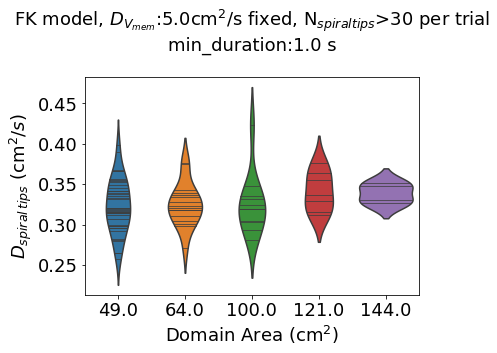

In [333]:
fontsize=18
#TODO: make plot function for plotting error bars
ax = sns.violinplot(x="area", y="Dhat", data=d, inner="stick")
ax.set_xlabel(r'Domain Area (cm$^2$)',fontsize=fontsize)
ax.set_ylabel(r'$D_{spiral\,tips}$ (cm$^2/s$)',fontsize=fontsize)
ax.set_title(f'FK model, $D_{{V_{{mem}}}}$:{diffCoef}cm$^2$/s fixed, N$_{{spiral tips}}$>{num_individuals_thresh-1} per trial\nmin_duration:{1:.1f} s\n',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
plt.show()

# Showing independence of $D_\text{spiral tips}$ for $A_\text{domain}=49cm^2$ fixed


In [334]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

In [335]:
num_individuals_thresh=31
area_lst=sorted(set(df['area'].values))

area=area_lst[1]

d=df[(df.area==area)&(df.num_individuals>=num_individuals_thresh)]
vals=d.DVmem.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
DVmem_lst=sorted(set(vals))
print(f"DVmem values present are {DVmem_lst} cm^2/s \nfor area={area} cm^2  fixed.")

max:1.0, mean:0.3246794871794872, min:0.01
DVmem values present are [0.01, 0.05, 0.25, 0.5, 0.75, 1.0] cm^2/s 
for area=49.0 cm^2  fixed.


In [336]:
df[(df.area==area)].describe()

,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,DVmem
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.0,330.00000
mean,1.169638,0.844296,0.327204,0.002720,0.995618,3.080198,0.023965,0.999822,27.969697,1.530626,49.0,0.33803
std,0.098320,0.068482,0.053419,0.000820,0.001900,0.202643,0.036126,0.000891,17.809333,2.100710,0.0,0.36316
min,0.920404,0.668230,0.204414,0.001388,0.981508,2.588550,0.004459,0.991890,2.000000,0.000250,49.0,0.01000
25%,1.114697,0.810107,0.295844,0.002261,0.995062,2.998296,0.014828,0.999924,10.000000,0.000750,49.0,0.05000
50%,1.164382,0.843476,0.320158,0.002472,0.996009,3.059177,0.018403,0.999945,28.000000,0.001000,49.0,0.25000
75%,1.228799,0.882767,0.352632,0.002992,0.996533,3.102148,0.022059,0.999964,43.000000,5.000000,49.0,0.75000
max,1.623119,1.082166,0.591591,0.007211,0.999036,4.516203,0.333435,0.999996,62.000000,5.000000,49.0,1.00000


In [338]:
D_uncertainty_lst=[]
D_expected_lst=[]
#print the average+-stdev output feature for each fixed area
for DVmem in DVmem_lst:
    #compute the net uncertainty from the stdev of Dhat with mean Delta_Dhat
    f=d[d.DVmem==DVmem]
    D_uncertainty=np.sqrt((2*f.Dhat.std())**2+f.Delta_Dhat.mean()**2)
    D_expected=f.Dhat.mean()
    print(f"with area={area} cm^2 fixed and diffCoef={DVmem} cm^2/s fixed,")
    print(f"for {f.Dhat.count()} trials having at least {num_individuals_thresh} individuals,")
    print(f"the 95% CI for D_spiral_tips was {D_expected:.4f} +-{D_uncertainty:.4f} cm^2/s.\n")
    D_uncertainty_lst.append(D_uncertainty)
    D_expected_lst.append(D_expected)

with area=49.0 cm^2 fixed and diffCoef=0.01 cm^2/s fixed,
for 35 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3271 +-0.0626 cm^2/s.

with area=49.0 cm^2 fixed and diffCoef=0.05 cm^2/s fixed,
for 41 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3231 +-0.0662 cm^2/s.

with area=49.0 cm^2 fixed and diffCoef=0.25 cm^2/s fixed,
for 23 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3150 +-0.0674 cm^2/s.

with area=49.0 cm^2 fixed and diffCoef=0.5 cm^2/s fixed,
for 19 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3259 +-0.0688 cm^2/s.

with area=49.0 cm^2 fixed and diffCoef=0.75 cm^2/s fixed,
for 20 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3147 +-0.0591 cm^2/s.

with area=49.0 cm^2 fixed and diffCoef=1.0 cm^2/s fixed,
for 18 trials having at least 31 individuals,
the 95% CI for D_spiral_tips was 0.3281 +-0.0749 cm^2/s.



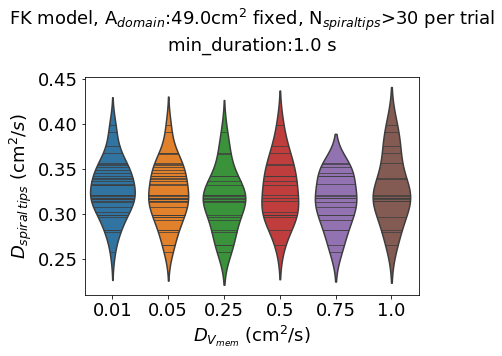

In [339]:
fontsize=18
ax = sns.violinplot(x="DVmem", y="Dhat", data=d, inner="stick")
ax.set_xlabel(r'$D_{V_{mem}}$ (cm$^2/$s)',fontsize=fontsize)
ax.set_ylabel(r'$D_{spiral\,tips}$ (cm$^2/s$)',fontsize=fontsize)
ax.set_title(f'FK model, A$_{{domain}}$:{area}cm$^2$ fixed, N$_{{spiral tips}}$>{num_individuals_thresh-1} per trial\nmin_duration:{1:.1f} s\n',fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=0)
plt.show()

# Supporting diffusive behavior for area and DVmem fixed

In [ ]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

In [157]:
#get all trials for a given DVmem and area
num_individuals_thresh=31
area=area_lst[1]
DVmem=DVmem_lst[1]
boo=df.area==area
boo&=df.DVmem==DVmem
boo&=df.num_individuals>=num_individuals_thresh
d=df[boo]
d.head()

,exponent_final,exponent_500,Dhat,Delta_Dhat,Rsquared_D,v_rms,Delta_v_rms,Rsquared_v,num_individuals,diffCoef,area,model,DVmem
89,1.020631,0.792678,0.210506,0.004141,0.976477,3.029652,0.019033,0.999941,31,5.0,64.0,param_set_8,0.05
142,1.160408,0.860310,0.238295,0.004664,0.976705,2.985281,0.016497,0.999954,58,5.0,64.0,param_set_8,0.05
154,1.163403,0.861821,0.241526,0.004380,0.979939,3.045904,0.023058,0.999914,70,5.0,64.0,param_set_8,0.05
159,1.118383,0.819863,0.224304,0.004587,0.974630,3.033705,0.020685,0.999930,72,5.0,64.0,param_set_8,0.05
310,1.182280,0.872059,0.259087,0.004221,0.983748,3.187504,0.060897,0.999453,67,5.0,64.0,param_set_8,0.05


In [161]:
print(d[['exponent_final','exponent_500']].describe().T)

                count      mean       std       min       25%       50%  \
exponent_final   16.0  1.157023  0.064363  1.020631  1.121056  1.161905   
exponent_500     16.0  0.853208  0.035393  0.792678  0.833335  0.849204   

                     75%       max  
exponent_final  1.193279  1.259643  
exponent_500    0.866108  0.928346  


__Results__
- The 95% CI for the exponent_500 is significantly smaller than the 95% CI for exponent_final for $A_\text{domain}=64cm^2$ fixed and $D_{V_{mem}}=0.05 cm^2/s$ fixed.
- the final exponent is not significantly different from unity
- the exponent at 500 ms is significantly less than unity (with $p\le0.05$ for significance)

# scan through folder of cloud results, and add plots to axis when A_domain and D_Vmem have a given value

In [249]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

In [250]:
area=49.0#cm^2  #64
vals=df[df.area==area].diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"diffCoef's present are {diffCoef_lst}.")


max:5.0, mean:1.5306257575757576, min:0.00025
diffCoef's present are [0.00025, 0.0005, 0.00075, 0.001, 1.0, 5.0].


In [259]:
diffCoef=diffCoef_lst[0]

#declare query
DS=0.025
T_min=2000
num_individuals_thresh=31
L=int(np.sqrt(area/DS**2))
DVmem=np.around(df[df['diffCoef']==diffCoef]['DVmem'].mean(),5)
print(f"querying folder for fixed parameters: (diffCoef,L) = {(diffCoef,L)}.")

querying folder for fixed parameters: (diffCoef,L) = (0.00025, 280).


In [260]:
log_folder=f'{nb_dir}/../../care_worker/python/osg_output/Log/'
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the total number of output files in folder is {len(input_fn_lst)}.")
emsd_lst=[]
num_individuals_lst=[]
#compute the list of all summarizing results
df_output_lst=[]
for input_fn in input_fn_lst:
    line_no,dict_params=parse_input_params(input_fn)
    # print(dict_params)

    try:
        num_individuals=eval(dict_params['N'])
        boo=eval(dict_params['diffCoef'])==diffCoef
        boo&=eval(dict_params['L'])==L
        boo&=num_individuals>num_individuals_thresh
    except KeyError as e:
        boo=False
    if boo:
        emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
        # def summarize_trial(emsd,dict_params):
        area=(eval(dict_params['L'])*DS)**2#cm^2
        lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
        v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
        Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)
        df_output=pd.DataFrame({
            'exponent_final':slope_values[-1],
            'exponent_500':slope_values[lag_values==.5][0],
            "Dhat":[Dhat],
            "Delta_Dhat":[Delta_Dhat],
            "Rsquared_D":[Rsquared_D],
            "v_rms":v_rms,
            "Delta_v_rms":Delta_v_rms,
            "Rsquared_v":Rsquared_v,
            "num_individuals":num_individuals,
            "diffCoef":eval(dict_params['diffCoef']),
            'area':area,
            'model':'param_set_8'
        })
        #     print(num_individuals)
        df_output_lst.append(df_output)
        emsd_lst.append(emsd)
        num_individuals_lst.append(num_individuals)
print(f"the number of distinct trials are represented in this query is {len(emsd_lst)}.")

the total number of output files in folder is 2712.
the number of distinct trials are represented in this query is 22.


In [261]:
#compute avg_emsd, weighted by num_individuals_lst
Nnet=sum(num_individuals_lst)
lag_values=np.arange(0,T_min+1,1)
avg_emsd=0.*lag_values
index_values=emsd_lst[0].index.values
num_over=0
for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
    emsd=emsd.rename(columns={'lagt':'msd'}).copy()
    #fit spline curve to the given emsd
    x = emsd.index.values
    y = emsd.values
    interpolated_values=CubicSpline(x, y)(lag_values).T[0]
    weight=num_individuals/Nnet
    avg_emsd += weight*interpolated_values
    if x[-1]<=T_min:
        num_over+=1
print(f"the number of trials extrapolating is {num_over}.  If {num_over} is large, consider decreasing T_min.")

the number of trials extrapolating is 0.  If 0 is large, consider decreasing T_min.


In [262]:
#compute standard deviation of avg_emsd, weighted by num_individuals_lst
SSE_avg_emsd=0.*lag_values
index_values=emsd_lst[0].index.values
num_over=0
for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
    emsd=emsd.rename(columns={'lagt':'msd'}).copy()
    #fit spline curve to the given emsd
    x = emsd.index.values
    y = emsd.values
    interpolated_values=CubicSpline(x, y)(lag_values).T[0]
    weight=num_individuals/Nnet
    SSE_avg_emsd += weight*(interpolated_values-avg_emsd)**2
std_avg_emsd=np.sqrt(SSE_avg_emsd)

In [263]:
emsd_avg=pd.DataFrame(
    data=avg_emsd,
    index=lag_values,
    dtype=np.float64)
emsd_std=pd.DataFrame(
    data=std_avg_emsd,
    index=lag_values,
    dtype=np.float64)
#save emsd_avg as csv in care
save_folder=os.path.join(nb_dir,'Data/cloud_results/averages')
os.chdir(save_folder)
save_fn=f'emsd_avg_fk_diffCoef_{DVmem}_area_{area}.csv'
emsd_avg.to_csv(save_fn)
save_fn=f'emsd_std_fk_diffCoef_{DVmem}_area_{area}.csv'
emsd_std.to_csv(save_fn)
print(f'ensemble avg. emsd saved to\n{os.path.abspath(save_fn)}')

ensemble avg. emsd saved to
/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages/emsd_std_fk_diffCoef_0.25_area_49.0.csv


saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_50.png


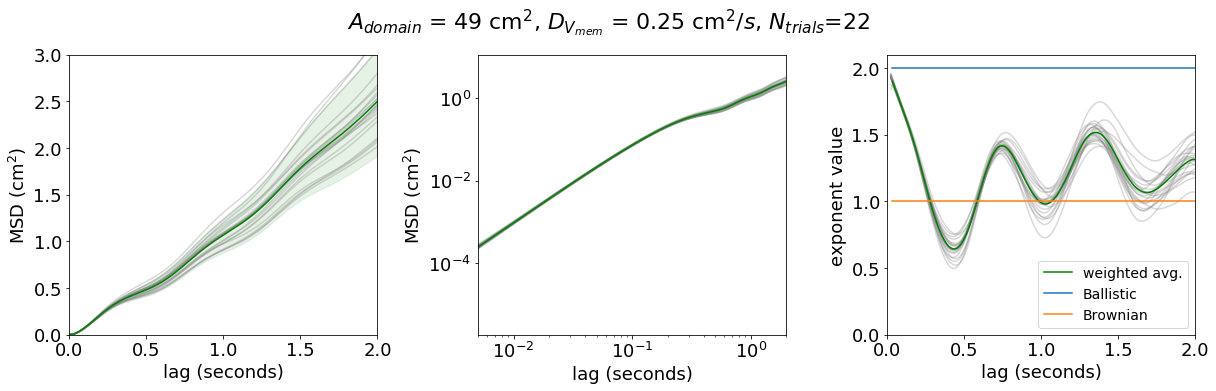

In [264]:
#for window_width in [50,300,500]:
window_width=50
omit_time=0
#plot emsd and exponent for fixed diffCoef and area
saving=True
savefig_folder=os.path.join(nb_dir,'Figures/cloud_results/')
savefig_fn=f'diffCoef_{DVmem}_area_{area}_fig_a_ww_{window_width}.png'

figsize=(17,5.5);fontsize=18
xmax=2;ymax=3
fig,axs=plt.subplots(ncols=3,figsize=figsize)
#plot an estimate for the 95% CI of the ensemble averaged EMSD
lowerbound=(emsd_avg.values-2*emsd_std.values).T[0]
upperbound=(emsd_avg.values+2*emsd_std.values).T[0]
axs[0].fill_between(x=lag_values/10**3,
        y1=lowerbound,y2=upperbound,
        interpolate=True,color='green',alpha=0.1,label='_Hidden')  
axs[1].fill_between(x=lag_values/10**3,
        y1=lowerbound,y2=upperbound,
        interpolate=True,color='green',alpha=0.1,label='_Hidden') 
#plot avg_emsd over each emsd in emsd_lst
for emsd in emsd_lst:
    plot_emsd(axs[0],emsd,label='_Hidden', color='grey',alpha=.3)
    plot_emsd(axs[1],emsd,label='_Hidden', color='gray',alpha=.3)
    tau_values,slope_values=compute_slope_vs_lag(emsd,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
    plot_slope_of_emsd(axs[2],tau_values,slope_values,label='_Hidden', color='gray', alpha=.3,plot_reference_lines=False) 
#plot the ensemble average emsd_avg
plot_emsd(axs[0],emsd_avg,label='_Hidden', color='green',alpha=1.)
format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)
plot_emsd(axs[1],emsd_avg,label='_Hidden', color='green',alpha=1.)
format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)
axs[0].set_xlim(0,xmax)
axs[0].set_ylim(0,ymax)
axs[1].set_xlim(5*10**-3,xmax)
ax=axs[2]
tau_values,slope_values=compute_slope_vs_lag(emsd_avg,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
plot_slope_of_emsd(ax,tau_values,slope_values,label='weighted avg.', color='green', alpha=1,plot_reference_lines=True)
format_slope_of_emsd(ax,fontsize=fontsize,use_loglog=False,plot_reference_lines=False)
ax.set_xlim(0,xmax)
ax.set_ylim(0,2.1)
ax.legend(loc='best',fontsize=fontsize-4,ncol=1)
fig.suptitle(f'$A_{{domain}}$ = {int(area)} cm$^2$, $D_{{V_{{mem}}}}$ = {DVmem} cm$^2/s$, $N_{{trials}}$={len(emsd_lst)}',fontsize=fontsize+4)
fig.subplots_adjust(top=.25)
plt.tight_layout()
if not saving:
    plt.show()
else:
    os.chdir(savefig_folder)
    plt.savefig(savefig_fn, dpi=300)
    print(f"saved figure in \n\t{savefig_fn}")
#     plt.close()

## Generate Fig. a for all diffCoef with area fixed

In [266]:
#import merged cloud results
data_dir=f'{nb_dir}/Data/cloud_results/cloud_results_fk_versus_diffCoef_versus_area.csv'
df=pd.read_csv(data_dir,index_col=0).reset_index(drop=True)
#make DVmem field that has the correct values for transmembrane diffusion coefficient
df['DVmem']=df['diffCoef']
df.loc[df.DVmem==1.0,'DVmem']=float(1e-05)
df.loc[df.DVmem==5.0,'DVmem']=float(5e-05)
df['DVmem']*=10**3
# df.head()

area=49.0#cm^2  #64
vals=df[df.area==area].diffCoef.values
print(f"max:{np.max(vals)}, mean:{np.mean(vals)}, min:{np.min(vals)}")
diffCoef_lst=sorted(set(vals))
print(f"looping over diffCoef in  {diffCoef_lst}.")

#declare query
DS=0.025
T_min=2000
num_individuals_thresh=31
L=int(np.sqrt(area/DS**2))

#find all raw emsd results from cloud
log_folder=f'{nb_dir}/../../care_worker/python/osg_output/Log/'
os.chdir(log_folder)
input_fn_lst=[os.path.abspath(fn) for fn in os.listdir() if fn.find('job.out.')!=-1]
print(f"the total number of output files in folder is {len(input_fn_lst)}.")

for diffCoef in diffCoef_lst:
    DVmem=np.around(df[df['diffCoef']==diffCoef]['DVmem'].mean(),5)
    print(f"querying folder for fixed parameters: (diffCoef,L) = {(diffCoef,L)}.")
    emsd_lst=[]
    num_individuals_lst=[]
    #compute the list of all summarizing results
    df_output_lst=[]
    for input_fn in input_fn_lst:
        line_no,dict_params=parse_input_params(input_fn)
        # print(dict_params)

        try:
            num_individuals=eval(dict_params['N'])
            boo=eval(dict_params['diffCoef'])==diffCoef
            boo&=eval(dict_params['L'])==L
            boo&=num_individuals>num_individuals_thresh
        except KeyError as e:
            boo=False
        if boo:
            emsd=pd.read_csv(input_fn,header=line_no+1,delim_whitespace=True)
            # def summarize_trial(emsd,dict_params):
            area=(eval(dict_params['L'])*DS)**2#cm^2
            lag_values,slope_values=compute_slope_vs_lag(emsd,T_min=1000,omit_time=150,window_width=500,stepsize=10)
            v_rms,Delta_v_rms,_,_,Rsquared_v,_=compute_v_rms(emsd,num_points=8)
            Dhat,Delta_Dhat,tau_min,tau_max,Rsquared_D,delta_tau=compute_Dhat(emsd,tau_min=300,window_width=500)
            df_output=pd.DataFrame({
                'exponent_final':slope_values[-1],
                'exponent_500':slope_values[lag_values==.5][0],
                "Dhat":[Dhat],
                "Delta_Dhat":[Delta_Dhat],
                "Rsquared_D":[Rsquared_D],
                "v_rms":v_rms,
                "Delta_v_rms":Delta_v_rms,
                "Rsquared_v":Rsquared_v,
                "num_individuals":num_individuals,
                "diffCoef":eval(dict_params['diffCoef']),
                'area':area,
                'model':'param_set_8'
            })
            #     print(num_individuals)
            df_output_lst.append(df_output)
            emsd_lst.append(emsd)
            num_individuals_lst.append(num_individuals)
    print(f"the number of distinct trials are represented in this query is {len(emsd_lst)}.")

    #compute avg_emsd, weighted by num_individuals_lst
    Nnet=sum(num_individuals_lst)
    lag_values=np.arange(0,T_min+1,1)
    avg_emsd=0.*lag_values
    index_values=emsd_lst[0].index.values
    num_over=0
    for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
        emsd=emsd.rename(columns={'lagt':'msd'}).copy()
        #fit spline curve to the given emsd
        x = emsd.index.values
        y = emsd.values
        interpolated_values=CubicSpline(x, y)(lag_values).T[0]
        weight=num_individuals/Nnet
        avg_emsd += weight*interpolated_values
        if x[-1]<=T_min:
            num_over+=1
    print(f"the number of trials extrapolating is {num_over}.  If {num_over} is large, consider decreasing T_min.")

    #compute standard deviation of avg_emsd, weighted by num_individuals_lst
    SSE_avg_emsd=0.*lag_values
    index_values=emsd_lst[0].index.values
    num_over=0
    for i,(emsd,num_individuals,df_output) in enumerate(zip(emsd_lst,num_individuals_lst,df_output_lst)):
        emsd=emsd.rename(columns={'lagt':'msd'}).copy()
        #fit spline curve to the given emsd
        x = emsd.index.values
        y = emsd.values
        interpolated_values=CubicSpline(x, y)(lag_values).T[0]
        weight=num_individuals/Nnet
        SSE_avg_emsd += weight*(interpolated_values-avg_emsd)**2
    std_avg_emsd=np.sqrt(SSE_avg_emsd)

    emsd_avg=pd.DataFrame(
        data=avg_emsd,
        index=lag_values,
        dtype=np.float64)
    emsd_std=pd.DataFrame(
        data=std_avg_emsd,
        index=lag_values,
        dtype=np.float64)
    #save emsd_avg as csv in care
    save_folder=os.path.join(nb_dir,'Data/cloud_results/averages')
    os.chdir(save_folder)
    save_fn=f'emsd_avg_fk_diffCoef_{DVmem}_area_{area}.csv'
    emsd_avg.to_csv(save_fn)
    save_fn=f'emsd_std_fk_diffCoef_{DVmem}_area_{area}.csv'
    emsd_std.to_csv(save_fn)
#     print(f'ensemble avg. emsd saved to\n{os.path.abspath(save_fn)}')

    for window_width in [50,300,500]:
#         window_width=50
        omit_time=0
        #plot emsd and exponent for fixed diffCoef and area
        saving=True
        savefig_folder=os.path.join(nb_dir,'Figures/cloud_results/')
        savefig_fn=f'diffCoef_{DVmem}_area_{area}_fig_a_ww_{window_width}.png'

        figsize=(17,5.5);fontsize=18
        xmax=2;ymax=3
        fig,axs=plt.subplots(ncols=3,figsize=figsize)
        #plot an estimate for the 95% CI of the ensemble averaged EMSD
        lowerbound=(emsd_avg.values-2*emsd_std.values).T[0]
        upperbound=(emsd_avg.values+2*emsd_std.values).T[0]
        axs[0].fill_between(x=lag_values/10**3,
                y1=lowerbound,y2=upperbound,
                interpolate=True,color='green',alpha=0.1,label='_Hidden')  
        axs[1].fill_between(x=lag_values/10**3,
                y1=lowerbound,y2=upperbound,
                interpolate=True,color='green',alpha=0.1,label='_Hidden') 
        #plot avg_emsd over each emsd in emsd_lst
        for emsd in emsd_lst:
            plot_emsd(axs[0],emsd,label='_Hidden', color='grey',alpha=.3)
            plot_emsd(axs[1],emsd,label='_Hidden', color='gray',alpha=.3)
            tau_values,slope_values=compute_slope_vs_lag(emsd,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
            plot_slope_of_emsd(axs[2],tau_values,slope_values,label='_Hidden', color='gray', alpha=.3,plot_reference_lines=False) 
        #plot the ensemble average emsd_avg
        plot_emsd(axs[0],emsd_avg,label='_Hidden', color='green',alpha=1.)
        format_plot_emsd(axs[0],use_loglog=False,fontsize=fontsize)
        plot_emsd(axs[1],emsd_avg,label='_Hidden', color='green',alpha=1.)
        format_plot_emsd(axs[1],use_loglog=True,fontsize=fontsize)
        axs[0].set_xlim(0,xmax)
        axs[0].set_ylim(0,ymax)
        axs[1].set_xlim(5*10**-3,xmax)
        ax=axs[2]
        tau_values,slope_values=compute_slope_vs_lag(emsd_avg,T_min=T_min,omit_time=omit_time,window_width=window_width,stepsize=10)
        plot_slope_of_emsd(ax,tau_values,slope_values,label='weighted avg.', color='green', alpha=1,plot_reference_lines=True)
        format_slope_of_emsd(ax,fontsize=fontsize,use_loglog=False,plot_reference_lines=False)
        ax.set_xlim(0,xmax)
        ax.set_ylim(0,2.1)
        ax.legend(loc='best',fontsize=fontsize-4,ncol=1)
        fig.suptitle(f'$A_{{domain}}$ = {int(area)} cm$^2$, $D_{{V_{{mem}}}}$ = {DVmem} cm$^2/s$, $N_{{trials}}$={len(emsd_lst)}',fontsize=fontsize+4)
        fig.subplots_adjust(top=.25)
        plt.tight_layout()
        if not saving:
            plt.show()
        else:
            os.chdir(savefig_folder)
            plt.savefig(savefig_fn, dpi=300)
#             print(f"saved figure in {savefig_fn}")
            plt.close()

max:5.0, mean:1.5306257575757576, min:0.00025
looping over diffCoef in  [0.00025, 0.0005, 0.00075, 0.001, 1.0, 5.0].
the total number of output files in folder is 2712.
querying folder for fixed parameters: (diffCoef,L) = (0.00025, 280).
the number of distinct trials are represented in this query is 22.
the number of trials extrapolating is 0.  If 0 is large, consider decreasing T_min.
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_50.png
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_300.png
saved figure in 
	diffCoef_0.25_area_49.0_fig_a_ww_500.png
querying folder for fixed parameters: (diffCoef,L) = (0.0005, 280).
the number of distinct trials are represented in this query is 18.
the number of trials extrapolating is 0.  If 0 is large, consider decreasing T_min.
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_50.png
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_300.png
saved figure in 
	diffCoef_0.5_area_49.0_fig_a_ww_500.png
querying folder for fixed parameters: (diff

In [180]:
#TODO: make fig_b, which visualizes the distributions of D, v_rms 
#TODO: overlay a poisson pmf with a fit to the mean D, v_rms
#TODO: consider adding third panel with distributions for a lag-averaged averaged exponent
#TODO: consider adding third panel with distributions for the characteristic timescale, tau_0

In [148]:
#TODO(later): compute std_emsd, weighted by num_individuals_lst

In [146]:
#DONE: compute the net uncertainty from the stdev of v_rms with mean Delta_v_rms
#TODO: plot on 1 axis all exponent traces for area fixed and diffusion coefficient fixed
#DONE/ignore: repeat ^that for several fixed areas
#TODO: plot on 1 axis, the exponent traces for area varying and diffusion coefficient fixed
#TODO: repeat ^that for several fixed diffusion coefficients

#TODO: query the log_folder for emsd with inputs satisfying a condition.
#TODO: plot emsd versus lag and expoenent at few corners using the viewer functions I already made
#TODO: make a phase diagram of some interesting feature distinguishing the corners (for ^that)

# TODO: Computing spiral tip parameters for the trial-averaged EMSD

In [267]:
file=search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages/emsd_avg_fk_diffCoef_0.01_area_49.0.csv


NameError: name 'area_values' is not defined

In [3]:
data_folder='/home/timothytyree/Documents/GitHub/care/notebooks/Data/cloud_results/averages'
os.chdir(data_folder)
area_trgt=49.0
Dhat_lst=[];Delta_Dhat_lst=[]
v_rms_lst=[];Delta_v_rms_lst=[]
for fn in sorted(os.listdir()):
    try:
        trgt='diffCoef_'
        DVmem=eval(fn[fn.find(trgt)+len(trgt):].split('_')[0])#cm^2/s
        trgt='area_'
        area=eval(fn[fn.find(trgt)+len(trgt):].split('.csv')[0])#cm^2
        key=(DVmem,area)
        if area==area_trgt:
            print(f"(DVmem,area) = {(DVmem,area)}:")
            emsd_avg=pd.read_csv(fn,index_col=0)
            Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(emsd_avg, tau_min=150, window_width=1500)
            print(f"\tDbar = {Dhat:.5f} +- {Delta_Dhat:.5f} cm^2/s")
            v_rms,Delta_v_rms,_,_,Rsquared,_=compute_v_rms(emsd_avg,num_points=8)
#             print(f"\tv_rms = {v_rms:.5f} +- {Delta_v_rms:.5f} cm^2/s")
    except Exception as e:
        print(e)

(DVmem,area) = (0.01, 49.0):
	Dbar = 0.31347 +- 0.00161 cm^2/s
(DVmem,area) = (0.05, 49.0):
	Dbar = 0.30940 +- 0.00161 cm^2/s
(DVmem,area) = (0.25, 49.0):
	Dbar = 0.30443 +- 0.00164 cm^2/s
(DVmem,area) = (0.5, 49.0):
	Dbar = 0.31667 +- 0.00167 cm^2/s
(DVmem,area) = (0.75, 49.0):
	Dbar = 0.30019 +- 0.00154 cm^2/s
(DVmem,area) = (1.0, 49.0):
	Dbar = 0.31301 +- 0.00156 cm^2/s
(DVmem,area) = (0.01, 49.0):
	Dbar = 0.03210 +- 0.00024 cm^2/s
(DVmem,area) = (0.05, 49.0):
	Dbar = 0.03315 +- 0.00023 cm^2/s
(DVmem,area) = (0.25, 49.0):
	Dbar = 0.03340 +- 0.00027 cm^2/s
(DVmem,area) = (0.5, 49.0):
	Dbar = 0.03223 +- 0.00017 cm^2/s
(DVmem,area) = (0.75, 49.0):
	Dbar = 0.02505 +- 0.00011 cm^2/s
(DVmem,area) = (1.0, 49.0):
	Dbar = 0.03817 +- 0.00031 cm^2/s


In [369]:
# compute_v_rms(emsd_avg,num_points=8)
np.isnan(np.sqrt(emsd_avg.values.flatten())[:8])

array([ True, False, False, False, False, False, False, False])

In [299]:
# TODO: plot apparent Dhat versus lag

ValueError: x and y must have same first dimension, but have shapes (2001,) and (70,)

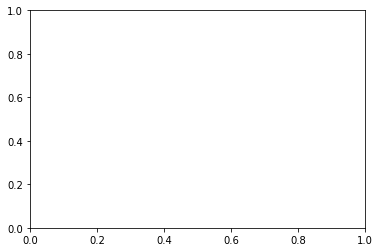

In [344]:
#fit spline curve to the given derivative of emsd versus lag
x = emsd_avg.index.values
y = emsd_avg.values
dmsd_dlag=CubicSpline(x, y)(lag_values,1).T[0]*10**3/4
plt.plot(x/10**3,dmsd_dlag)
plt.xlabel('lag (s)')
plt.ylabel(r'D_{{spiral\,tips}} (cm$^2/$s)')
plt.show()

In [4]:
return_tips_from_txt

NameError: name 'return_tips_from_txt' is not defined

In [343]:
Dhat,Delta_Dhat,tau_min,tau_max,Rsquared,delta_tau=compute_Dhat(emsd_avg, tau_min=400, window_width=2000)
print(f"Dbar = {Dhat:.5f} +- {Delta_Dhat:.5f} cm^2/s")

Dbar = 0.33708 +- 0.00110 cm^2/s


In [8]:
diffCoef=0.0005;width=200;height=200;dsdpixel=0.025
param_fn = 'param_set_8.json'
print(f"param_fn is {param_fn}.")
param_dir = os.path.join(nb_dir,'lib/model')
param_dict = json.load(open(os.path.join(param_dir,param_fn)))
param_dict['diffCoef']=diffCoef
#get time step with external stimulus for FK model
get_time_step=fetch_get_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)
time_step=fetch_time_step(width,height,DX=dsdpixel,DY=dsdpixel,**param_dict)

param_fn is param_set_8.json.


In [9]:
fetch_get_time_step

<function lib.model.minimal_model.fetch_get_time_step(width, height, DX=0.025, DY=0.025, **param_dict)>